In [84]:
!pip install vaderSentiment

In [85]:
#importing libraries
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
from nltk.corpus import stopwords
from collections import Counter
from sklearn.linear_model import LinearRegression
from itertools import product
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer, word_tokenize
from nltk.stem import WordNetLemmatizer
from numpy.linalg import norm
from math import log
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from vaderSentiment.vaderSentiment  import  SentimentIntensityAnalyzer
stopwords = stopwords.words('english')


%matplotlib inline
sns.set(color_codes = True)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [86]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [87]:
df=pd.read_excel('/content/drive/MyDrive/beer-reviews.xlsx')


In [88]:
df.head()

,item,body,rating
0,Kentucky Brunch Brand Stout,"Amazing stout, expensive but worth the price!",5.00
1,Kentucky Brunch Brand Stout,This beer meet and exceeded all the unreal hyp...,5.00
2,Kentucky Brunch Brand Stout,Let it sit and warm to the room a little ... u...,5.00
3,Kentucky Brunch Brand Stout,"A small pour, ebony dark, no real head. Intens...",4.67
4,Kentucky Brunch Brand Stout,"Vintage 2022, served on tap at Toppling Goliat...",5.00


In [89]:

def remove_stopwords(text):
    words = nltk.word_tokenize(text)
    stop_words = set(stopwords)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    filtered_words = [word for word in filtered_words if word.isalnum()]
    return " ".join(filtered_words)
df['body']=df['body'].str.lower()

df['body'] = df['body'].astype(str).apply(remove_stopwords)
df['body']


0                     amazing stout expensive worth price
1           beer meet exceeded unreal hype simply amazing
2                   let sit warm room little unbelievable
3       small pour ebony dark real head intense rich a...
4       vintage 2022 served tap toppling goliath snuli...
                              ...                        
6627    good god man holy shit really good beer blesse...
6628    appearance bubble show lifts head fullsome thr...
6629    pours sure describe color golden yellow brown ...
6630    tropical nose sweet like sunnyd nice acidity a...
6631        worst mouthfeel carbonation excessively sweet
Name: body, Length: 6632, dtype: object

# Task B
Assume that a customer, who will be using this recommender system, has specified 3 attributes
in a product. E.g., one website describes multiple attributes of beer (but you should choose attributes
from the actual data)
Perform a word frequency analysis of beer reviews is a better way
to find important attributes in the actual data.

In [90]:
beer_attributes = [
    "aromatic", "hoppy", "malty", "bitter", "sweet", "sour", "fruity", "citrusy", "spicy", "floral", "earthy", "woody", "herbal", "caramel",
    "roasty", "nutty", "chocolatey", "smoky", "creamy", "crisp", "smooth", "hazy", "clear", "cloudy", "full-bodied", "light-bodied",
    "refreshing", "complex", "balanced", "robust", "dry", "sweetness", "alcohol content", "carbonation", "mouthfeel", "aftertaste",
    "head retention", "astringency", "esters", "phenols", "acidity", "diacetyl", "yeastiness", "clarification", "oxidation", "temperature",
    "abv (alcohol by volume)", "ibu (international bitterness units)", "srm (standard reference method)", "gravity", "fermentation", "lagering",
    "ale", "pilsner", "stout", "porter", "wheat", "lambic", "saison", "ipa (india pale ale)", "apa (american pale ale)", "dipa (double ipa)",
    "tripel", "quadrupel", "belgian", "german", "british", "american", "czech", "irish", "scottish", "baltic", "hefeweizen", "kolsch", "barleywine",
    "sours", "barrel-aged", "tropical", "funky", "crispy", "toasty", "tangy", "savory", "juicy", "effervescent", "velvety", "silky", "pungent",
    "robust", "elegant", "velvety", "bold", "harmonious", "well-rounded", "intense", "layered"]

In [91]:
# Calculate word frequencies using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['body'])

# Calculate the frequency of each word in the reviews
word_frequencies = pd.DataFrame({'word': vectorizer.get_feature_names_out(), 'frequency': np.array(X.sum(axis=0))[0]})
word_frequencies=word_frequencies.sort_values(['frequency'],ascending=False)
word_frequencies

,word,frequency
1829,beer,5266
7320,head,3650
14880,taste,3483
8867,light,2891
8885,like,2537
...,...,...
7520,hoax,1
7521,hobbyists,1
7526,hog,1
7527,hogan,1


In [92]:
word_list = list(word_frequencies['word'])
attributes = [x for x in word_list if x in beer_attributes]
print(attributes)

['sweet', 'carbonation', 'mouthfeel', 'smooth', 'caramel', 'clear', 'sweetness', 'dry', 'bitter', 'malty', 'creamy', 'stout', 'balanced', 'crisp', 'hazy', 'earthy', 'ale', 'sour', 'aftertaste', 'floral', 'fruity', 'refreshing', 'spicy', 'complex', 'hoppy', 'belgian', 'herbal', 'tropical', 'american', 'wheat', 'juicy', 'cloudy', 'funky', 'roasty', 'woody', 'intense', 'silky', 'pilsner', 'porter', 'bold', 'acidity', 'citrusy', 'toasty', 'nutty', 'german', 'barleywine', 'esters', 'saison', 'temperature', 'tripel', 'robust', 'effervescent', 'velvety', 'tangy', 'lambic', 'gravity', 'astringency', 'smoky', 'pungent', 'aromatic', 'hefeweizen', 'oxidation', 'diacetyl', 'chocolatey', 'sours', 'savory', 'phenols', 'fermentation', 'layered', 'irish', 'british', 'elegant', 'crispy', 'czech', 'yeastiness', 'baltic', 'quadrupel', 'scottish', 'harmonious', 'kolsch']


In [93]:
array_df = pd.DataFrame({'attribute': attributes})
attr_word_freq=word_frequencies.merge(array_df,left_on='word', right_on='attribute')
attr_word_freq= attr_word_freq.drop('attribute',axis=1)
attr_word_freq

,word,frequency
0,sweet,2146
1,carbonation,1826
2,mouthfeel,1176
3,smooth,1042
4,caramel,966
...,...,...
75,baltic,8
76,quadrupel,5
77,scottish,3
78,harmonious,3


## Task C

Perform a similarity analysis using cosine similarity (without word embeddings) with the 3 attributes specified by the customer and the reviews.
The similarity script should accept as input a file with the product attributes, and calculate similarity scores (between 0 and 1) between these attributes and each review. That is, the output file should have 3 columns – product_name (for each product, the product_name will repeat as many times as there are reviews of the product), product_review and similarity_score.


In [94]:
#open text file in read mode
text_file = open("/attributes.txt", "r")
user_pref = text_file.read().lower()
#close file

text_file.close()

words_to_compare = user_pref.split(',')

words_to_compare = [word.strip() for word in words_to_compare]

words_to_compare

['sweet', 'carbonation', 'mouthfeel']

In [95]:
#performing cosine similarity

# Create a CountVectorizer with a custom vocabulary
vectorizer = CountVectorizer(vocabulary=words_to_compare)

# Transform the 'body' column using CountVectorizer
X = vectorizer.transform(df['body'])
Y = vectorizer.transform(words_to_compare)
# Calculate cosine similarity
cosine_similarities = cosine_similarity(X, Y)

# Create a new DataFrame with product name, product review, and similarity score
result_df = pd.DataFrame({
    'Product Name': df['item'],
    'Product Review': df['body'],
    'Similarity Score': cosine_similarities.mean(axis=1)
})

# Display the result DataFrame
similarity_df = result_df.sort_values(by='Similarity Score',ascending = False)
similarity_df

,Product Name,Product Review,Similarity Score
6631,Worst Beer,worst mouthfeel carbonation excessively sweet,0.57735
4384,Curiosity Thirty Two,16oz dated 20oz pint glass message welcome bac...,0.57735
2919,New,pours pale golden plenty carbonation rising de...,0.57735
444,Wee Heavy,bought alesmith brewery san diego ca beer tast...,0.57735
2489,Oude Geuze Golden Blend,pours slightly hazy golden honey color fairly ...,0.57735
...,...,...,...
2923,New,curious lack destinct flavor,0.00000
2924,New,grainy worth try,0.00000
2925,Voodoo Ranger Fruit Force,disgusting shameful real crappy beer new belgi...,0.00000
2927,Voodoo Ranger Fruit Force,transported back 1969 memory stirring glass ha...,0.00000


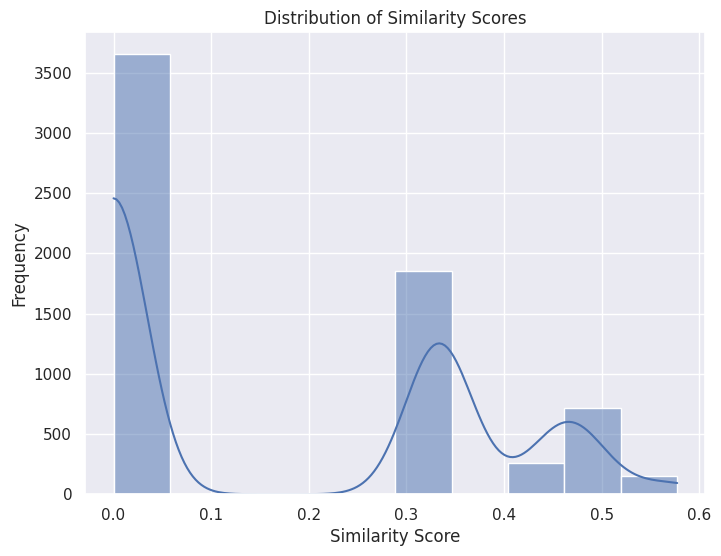

In [96]:
# Plot the distribution of similarity scores
plt.figure(figsize=(8, 6))
sns.histplot(data=similarity_df, x='Similarity Score', bins=10, kde=True)
plt.xlabel('Similarity Score')
plt.ylabel('Frequency')
plt.title('Distribution of Similarity Scores')
plt.show()

## Task D

For every review, perform a sentiment analysis (using VADER or any LLM). In case you have to change the default values of words in the VADER lexicon

In [97]:

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to perform sentiment analysis using VADER
def perform_sentiment_analysis(text):
    sentiment_scores = analyzer.polarity_scores(text)
    return sentiment_scores

# Apply sentiment analysis to each review and store the scores in a new column
similarity_df['Sentiment Scores'] = similarity_df['Product Review'].apply(perform_sentiment_analysis)
sentiment_similarity_df = similarity_df.sort_values(by = 'Similarity Score', ascending = False)
sentiment_similarity_df

,Product Name,Product Review,Similarity Score,Sentiment Scores
6631,Worst Beer,worst mouthfeel carbonation excessively sweet,0.57735,"{'neg': 0.406, 'neu': 0.297, 'pos': 0.297, 'co..."
4973,Black Butte Porter,look black nearly opaque deep held light tan h...,0.57735,"{'neg': 0.088, 'neu': 0.569, 'pos': 0.343, 'co..."
3741,Schaefer Light,silly attempt philosophical description review...,0.57735,"{'neg': 0.047, 'neu': 0.524, 'pos': 0.43, 'com..."
4536,Game Day Light,poured pale gold shaker pint glass three finge...,0.57735,"{'neg': 0.064, 'neu': 0.651, 'pos': 0.285, 'co..."
6621,King JJJuliusss,poured snifter beer pours super hazy color mas...,0.57735,"{'neg': 0.0, 'neu': 0.742, 'pos': 0.258, 'comp..."
...,...,...,...,...
5172,Michelob Ultra Amber,carbs 95 cals 4 abv 12 fl oz usd per sixer bou...,0.00000,"{'neg': 0.113, 'neu': 0.632, 'pos': 0.256, 'co..."
5173,Michelob Ultra Amber,like solid light easy drinking beer,0.00000,"{'neg': 0.0, 'neu': 0.3, 'pos': 0.7, 'compound..."
5918,Carlton Cold,looks like beer smells tastes like urine metal...,0.00000,"{'neg': 0.166, 'neu': 0.61, 'pos': 0.224, 'com..."
5174,Black Tuesday - Reserve,believe 2018 bottle 4 years aged leaned toward...,0.00000,"{'neg': 0.04, 'neu': 0.769, 'pos': 0.191, 'com..."


## Task E

Create an evaluation score for each beer that uses both similarity and sentiment scores.
Now recommend 3 products to the customer.


In [99]:
# Defining weights for similarity and sentiment scores... giving 70% weight to similarity
similarity_weight = 0.7
sentiment_weight = 0.3

# Function to calculate the evaluation score using
def calculate_evaluation_score(similarity_score, sentiment_score):
    overall_sentiment_score = sentiment_score['compound']
    # Calculate the evaluation score as a weighted sum
    evaluation_score = (similarity_weight * similarity_score) + (sentiment_weight * overall_sentiment_score)
    return evaluation_score

# Calculate the evaluation score for each beer
sentiment_similarity_df['Evaluation Score'] = sentiment_similarity_df.apply(lambda row: calculate_evaluation_score(row['Similarity Score'], row['Sentiment Scores']), axis=1)

# Sort the beers by their evaluation scores in descending order
sentiment_similarity_df = sentiment_similarity_df.sort_values(by='Evaluation Score', ascending=False)

# Recommend the top 3 brands based on the highest evaluation scores
top_3_brands = sentiment_similarity_df.head(3)[['Product Name', 'Evaluation Score']]

# Display the recommended top 3 brands
print("Top 3 Recommended Brands:")
print(top_3_brands)


Top 3 Recommended Brands:
             Product Name  Evaluation Score
4058  Oktoberfest M√§rzen          0.703455
3181  Rodenbach Alexander          0.703125
6621      King JJJuliusss          0.702495


# Task H
Using the top four attributes of beer (from word frequency analysis), calculate the lifts between
these attributes and any 10 beers in your data. Choose one beer, and find the most similar beer (among
the remaining 9) using the lift values. Explain your method.

In [100]:
def initialize(list1, list2):
    attribute_mentions_per_review = {attribute: set() for attribute in list1 + list2}
    co_mentions = {}
    for attr1 in list1 + list2:
        co_mentions[attr1] = {}
        for brand in list1 + list2:
            co_mentions[attr1][brand] = 0
    individual_mentions = {attr: 0 for attr in list1 + list2}
    lift_ratios = {}
    lift_already_calculated = set()
    return co_mentions, attribute_mentions_per_review, individual_mentions, lift_ratios, lift_already_calculated

In [101]:
def calculate_lift(attr1, brand, co_mentions, individual_mentions, total_posts):
    if attr1 == brand:
        return 0  # Lift ratio between the same brand is 0
    # Calculate lift using the formula: lift(attr1, brand) = (P(attr1 and brand) / (P(attr1) * P(brand))) * N
    p_attr1_and_brand = co_mentions[attr1][brand]
    p_attr1 = individual_mentions[attr1]
    p_brand = individual_mentions[brand]
    if p_attr1 == 0 or p_brand == 0:
        return 0
    else:
        return (p_attr1_and_brand / (p_attr1 * p_brand)) * total_posts

In [102]:
#selected_beer_brands=["Mornin' Delight","Nelson","Stickee Monkee","The Wild One","Corsendonk Christmas Ale"]
selected_beer_brands=["Old Chub","Voodoo Ranger Juicy Haze IPA","Harvest Ale (Limited Edition)","The Angel's Share - Bourbon Barrel-Aged","Weihenstephaner Korbinian","G'Knight","Mirror Pond Pale Ale","Antarctica Pilsen","Dark Lord","Breakfast Stout"]
attributes=list(attr_word_freq['word'])[:10]
attributes

['sweet',
 'carbonation',
 'mouthfeel',
 'smooth',
 'caramel',
 'clear',
 'sweetness',
 'dry',
 'bitter',
 'malty']

In [103]:
lift_df = pd.DataFrame(index=attributes, columns=selected_beer_brands)
for brand in selected_beer_brands:
    for attr in attributes:
        # Calculate support and joint support
        df['body'].fillna('', inplace=True)
        support_attr = len(df[df['body'].str.contains(attr)]) / len(df)
        support_brand = len(df[df['item'] == brand]) / len(df)
        joint_support = len(df[(df['body'].str.contains(attr)) & (df['item'] == brand)]) / len(df)

        # Calculate lift
        if support_attr * support_brand == 0:
            lift = 0  # Avoid division by zero
        else:
            lift = joint_support / (support_attr * support_brand)

        lift_df.at[attr, brand] = lift



In [104]:
lift_df

,Old Chub,Voodoo Ranger Juicy Haze IPA,Harvest Ale (Limited Edition),The Angel's Share - Bourbon Barrel-Aged,Weihenstephaner Korbinian,G'Knight,Mirror Pond Pale Ale,Antarctica Pilsen,Dark Lord,Breakfast Stout
sweet,2.690285,0.348741,2.092444,1.177,1.711999,1.569333,0.523111,0.0,2.241904,1.255466
carbonation,0.576295,0.448229,1.68086,1.008516,1.466932,0.0,1.344688,2.017032,1.728884,0.806813
mouthfeel,0.840664,0.0,1.471162,2.206744,1.069936,2.206744,0.980775,0.0,1.681328,0.588465
smooth,0.978749,0.761249,2.283747,2.569215,0.62284,0.0,1.141873,1.141873,0.978749,2.055372
caramel,3.882904,0.0,3.775046,5.662568,4.118231,2.265027,1.510018,0.0,0.0,0.0
clear,0.999397,0.0,0.0,0.0,0.0,0.874473,2.331927,3.49789,0.0,0.0
sweetness,1.304998,0.0,3.044995,1.141873,0.830453,3.42562,0.0,0.0,1.304998,2.740496
dry,1.063332,0.0,0.620277,0.930415,0.676666,0.930415,0.0,0.0,0.0,0.744332
bitter,0.619234,0.481627,0.72244,0.0,0.788116,1.08366,0.72244,0.72244,0.619234,2.600784
malty,5.562203,0.0,1.081539,0.0,2.359722,3.244618,0.0,0.0,0.0,0.0


In [105]:
# Choose a reference beer (replace with the beer you want to use as reference)
reference_beer = 'Weihenstephaner Korbinian'

# Create a dictionary to store the most similar beer for each reference attribute
most_similar_beers = {}

# Iterate through the remaining nine beers
for beer in selected_beer_brands:
    if beer != reference_beer:  # Exclude the reference beer itself
        most_similar_attribute = None
        highest_lift = 0.0

        # Find the attribute with the highest lift value when associated with the reference beer
        for attribute in attributes:
            lift_value = lift_df.at[attribute, beer]
            if lift_value > highest_lift:
                highest_lift = lift_value
                most_similar_attribute = attribute

        # Store the most similar beer for the reference beer
        most_similar_beers[beer] = (most_similar_attribute, highest_lift)

# Find the beer with the highest lift value
most_similar_beer = max(most_similar_beers, key=lambda x: most_similar_beers[x][1])
similar_attribute, highest_lift = most_similar_beers[most_similar_beer]

print(f"The most similar beer to {reference_beer} is {most_similar_beer} based on the attribute '{similar_attribute}' with a lift value of {highest_lift}.")

The most similar beer to Weihenstephaner Korbinian is The Angel's Share - Bourbon Barrel-Aged based on the attribute 'caramel' with a lift value of 5.66256830601093.
